# Dimensionaltiy Reduction Comparison and Stuff

something goes here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mmmmm colors.

In [58]:
colors = sns.color_palette('pastel')
colors

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## The Data

In [9]:
df = pd.read_pickle('./results.pkl')
df.head()

,model,chunk_size,overlap,embedding_dim,accuracy,query_size,space
0,contriever,100,0.0,1,2.800000,"(25, 50)",0.013443
1,contriever,100,0.0,3,10.914286,"(25, 50)",0.040329
2,contriever,100,0.0,5,23.085714,"(25, 50)",0.067215
3,contriever,100,0.0,7,34.457143,"(25, 50)",0.094101
4,contriever,100,0.0,9,41.657143,"(25, 50)",0.120987


### Compare Models

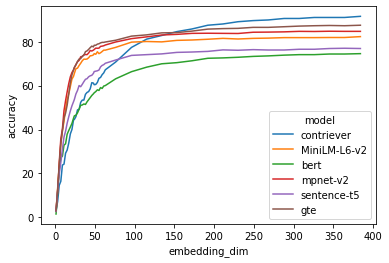

In [26]:
ax=sns.lineplot(data=df[(df['chunk_size'] == 300) & (df['overlap'] == 0) & (df['query_size'] == (25,50))], 
                x='embedding_dim', y='accuracy', hue='model')

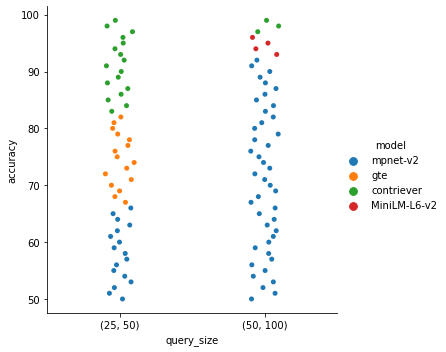

In [40]:
# best model
pts = []
for query_range in [(25,50), (50,100)]:
    for threshold in range(50,100):
        best_model = df[(df['accuracy'] >= threshold) & (df['query_size'] == query_range) ].sort_values(by=['space']).iloc[0]['model']
        pts.append((best_model, threshold, query_range))

ax = sns.catplot(data=pd.DataFrame(pts, columns=['model', 'accuracy', 'query_size']),
                 x='query_size', y='accuracy', hue='model')

In [76]:
df[(df['accuracy'] >= 95) & (df['query_size'] == (25,50)) ].sort_values(by=['space']).head(3)

,model,chunk_size,overlap,embedding_dim,accuracy,query_size,space
484,contriever,150,0.10,96,95.142857,"(25, 50)",0.951430
182,contriever,100,0.15,63,95.028571,"(25, 50)",0.995717
33,contriever,100,0.00,76,95.485714,"(25, 50)",1.021665


### Chunks

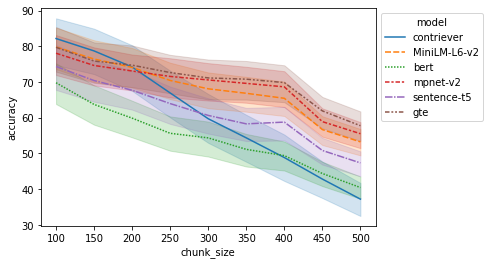

In [103]:
ax=sns.lineplot(data=df[(df['overlap'] == 0) & (df['query_size'] == (25,50))], 
                x='chunk_size', y='accuracy', hue='model', style='model')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

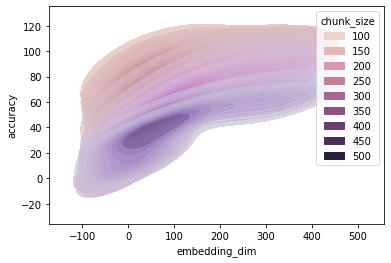

In [94]:
ax=sns.kdeplot(data=df[(df['model'] =='contriever') & (df['overlap'] == 0) & (df['query_size'] == (25,50))],
            x='embedding_dim', y='accuracy', hue='chunk_size', fill=True, alpha=.7)

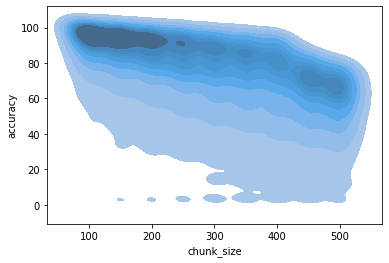

In [66]:
ax = sns.kdeplot(data=df, x='chunk_size', y='accuracy', fill=True, color=colors[0])

### Overlaps

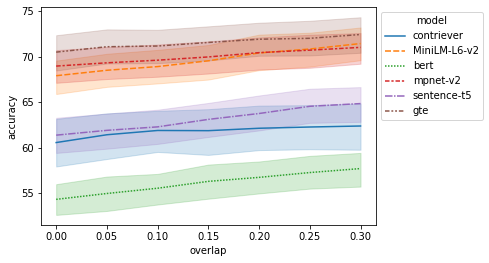

In [104]:
ax=sns.lineplot(data=df[(df['query_size'] == (25,50))], 
                x='overlap', y='accuracy', hue='model', style='model')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

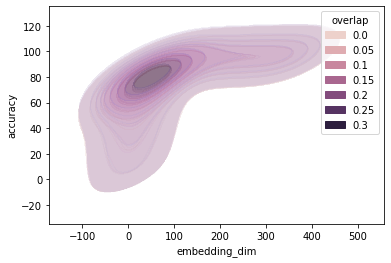

In [98]:
ax=sns.kdeplot(data=df[(df['model'] =='contriever') & (df['chunk_size'] == 200) & (df['query_size'] == (25,50))],
            x='embedding_dim', y='accuracy', hue='overlap', fill=True, alpha=.2)

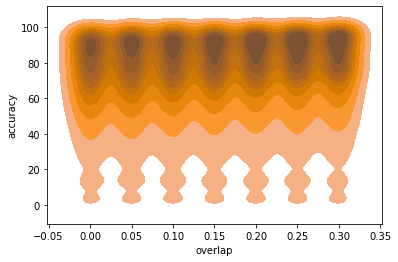

In [65]:
ax = sns.kdeplot(data=df, x='overlap', y='accuracy', fill=True, color=colors[1])

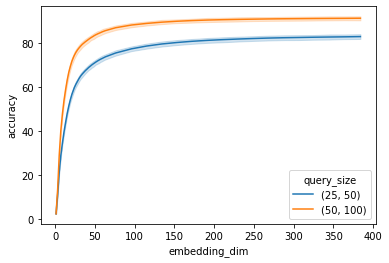

In [106]:
ax = sns.lineplot(data=df, x='embedding_dim', y='accuracy', hue='query_size')


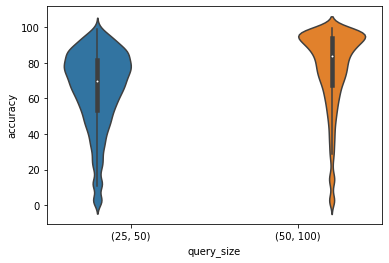

In [110]:
ax=sns.violinplot(data=df, x='query_size', y='accuracy', hue='query_size')
ax.get_legend().set_visible(False)

In [5]:
threshold = 95
df[(df['accuracy'] >= threshold) & (df['query_size'] == (50,100)) ].sort_values(by=['space']).head(3)

,model,chunk_size,overlap,embedding_dim,accuracy,query_size,space
10015,minilm,150,0.20,30,95.142857,"(50, 100)",0.333917
9917,minilm,150,0.10,34,95.200000,"(50, 100)",0.336965
9561,minilm,100,0.10,23,95.085714,"(50, 100)",0.343098
10065,minilm,150,0.25,30,95.085714,"(50, 100)",0.354403
10016,minilm,150,0.20,32,95.542857,"(50, 100)",0.356178
